### Imports & Load Data

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv', index_col='ID')
test_df = pd.read_csv('test.csv', index_col='ID')

### EDA & Visuals

In [3]:
train_df.head(5)

,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,,
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5760 non-null   object 
 1   y                          5760 non-null   int64  
 2   Hour                       5760 non-null   int64  
 3   Temperature(�C)            5760 non-null   float64
 4   Humidity(%)                5760 non-null   int64  
 5   Wind speed (m/s)           5760 non-null   float64
 6   Visibility (10m)           5760 non-null   int64  
 7   Dew point temperature(�C)  5760 non-null   float64
 8   Solar Radiation (MJ/m2)    5760 non-null   float64
 9   Rainfall(mm)               5760 non-null   float64
 10  Snowfall (cm)              5760 non-null   float64
 11  Seasons                    5760 non-null   object 
 12  Holiday                    5760 non-null   object 
 13  Functioning Day            5760 non-null   objec

In [5]:
test_df.head(5)

,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,
5760,21/12/2017,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes
5761,21/12/2017,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,Winter,No Holiday,Yes
5762,21/12/2017,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,Winter,No Holiday,Yes
5763,21/12/2017,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,Winter,No Holiday,Yes
5764,21/12/2017,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,Winter,No Holiday,Yes


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 5760 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       3000 non-null   object 
 1   Hour                       3000 non-null   int64  
 2   Temperature(�C)            3000 non-null   float64
 3   Humidity(%)                3000 non-null   int64  
 4   Wind speed (m/s)           3000 non-null   float64
 5   Visibility (10m)           3000 non-null   int64  
 6   Dew point temperature(�C)  3000 non-null   float64
 7   Solar Radiation (MJ/m2)    3000 non-null   float64
 8   Rainfall(mm)               3000 non-null   float64
 9   Snowfall (cm)              3000 non-null   float64
 10  Seasons                    3000 non-null   object 
 11  Holiday                    3000 non-null   object 
 12  Functioning Day            3000 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usa

In [7]:
# Extracting year, month and day

train_df['Date'] = pd.to_datetime(train_df['Date'],format="%d/%m/%Y")
test_df['Date'] = pd.to_datetime(test_df['Date'],format="%d/%m/%Y")

train_df['week_of_year'] = train_df['Date'].dt.isocalendar().week.astype(int)
test_df['week_of_year'] = test_df['Date'].dt.isocalendar().week.astype(int)

train_df['day_of_week'] = train_df['Date'].dt.weekday
test_df['day_of_week'] = test_df['Date'].dt.weekday

train_df['day'] = train_df['Date'].dt.day
test_df['day'] = test_df['Date'].dt.day

train_df['year'] = train_df['Date'].dt.year
test_df['year'] = test_df['Date'].dt.year

train_df['month'] = train_df['Date'].dt.month
test_df['month'] = test_df['Date'].dt.month

In [8]:
# check if thd train and test datasets have same days, months and years
print(train_df['day'].unique())
print(test_df['day'].unique())

print(train_df['month'].unique())
print(test_df['month'].unique())

print(train_df['year'].unique())
print(test_df['year'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[21 22 23 24 25 26 27 28 29 30 31]
[12  1  2  3  4  5  6  7  8  9 10 11]
[12  1  2  3  4  5  6  7  8  9 10 11]
[2017 2018]
[2017 2018]


- We can notice that days of train dataset is the first 20 days of the month, and the test dataset is the rest of the month.
- `Day` feature must be `neglected`.

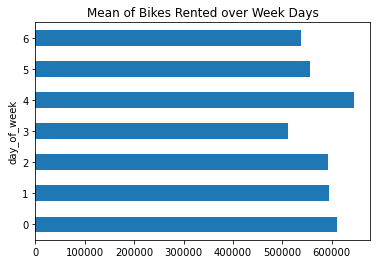

In [9]:
# Check mean of bike rented per days of week
train_df.groupby('day_of_week')['y'].sum().plot(kind='barh');
plt.title('Mean of Bikes Rented over Week Days');

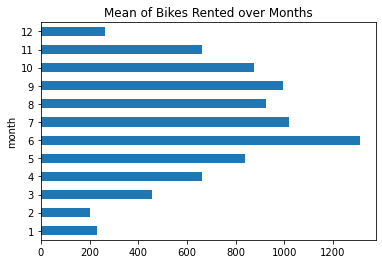

In [10]:
# Check mean of bike rented per months
train_df.groupby('month')['y'].mean().plot(kind='barh');
plt.title('Mean of Bikes Rented over Months');

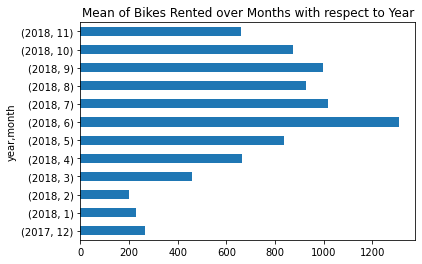

In [11]:
train_df.groupby(['year', 'month'])['y'].mean().plot(kind='barh');
plt.title('Mean of Bikes Rented over Months with respect to Year');

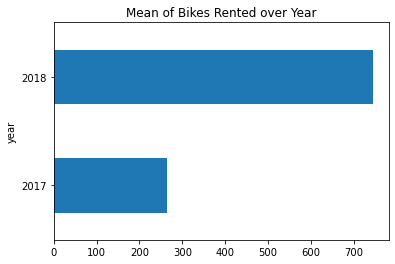

In [12]:
# Check mean of bike rented per year
train_df.groupby('year')['y'].mean().plot(kind='barh');
plt.title('Mean of Bikes Rented over Year');

- We notice that:
    - Almost all days are close, but `number` of rented bikes `decreases` in `Thursday, Saturday and Sunday`
    - `Number` of rented bikes `increases` in `Jun and Jul`, but `decreases` in `Dec, Jan and Feb`
    - `Number` of rented bikes is `differes` a lot from `2017 to 2018`, but 2017 has one month only and 2018 has 11 months.
    
- `month` features will `affect the model` predicts well.
- `day of week` and `year` can be `neglected` in case of `enhancing the model` predictions.

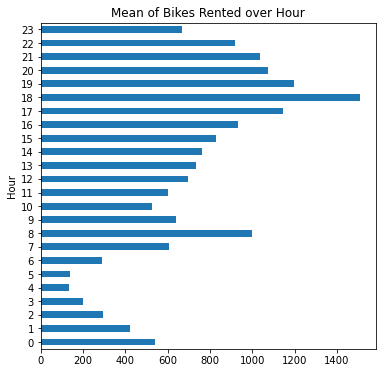

In [13]:
# Check mean of bike rented per hour
plt.figure(figsize=(6, 6))
train_df.groupby('Hour')['y'].mean().plot(kind='barh');
plt.title('Mean of Bikes Rented over Hour');

- Number of rented bikes `increases` mush at `8 & 16`
- Number of rented bikes `increases` at `night` more than morning
- Number of rented bikes `decreases` mush `after midnight` till the dawn

- `Hour` feature is so `important`.

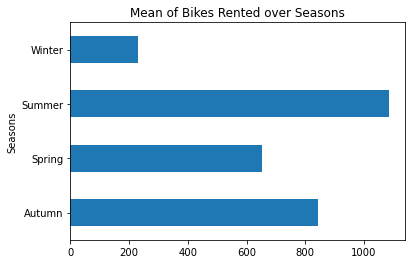

In [14]:
train_df.groupby('Seasons')['y'].mean().plot(kind='barh');
plt.title('Mean of Bikes Rented over Seasons');

- The same insight as months, in summer numbers of rented bikes increases and in winter decreases

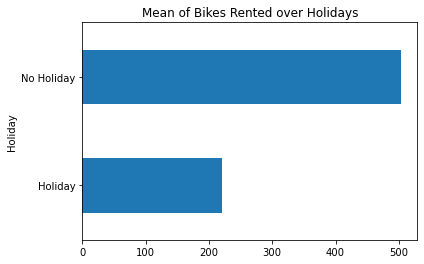

In [15]:
train_df.groupby('Holiday')['y'].median().plot(kind='barh');
plt.title('Mean of Bikes Rented over Holidays');

- Number of rented bikes increases is `No Holiday`

- It seems that with `increasing temperature`, number of bikes rented `increases`
- Temperature will be a good feature.

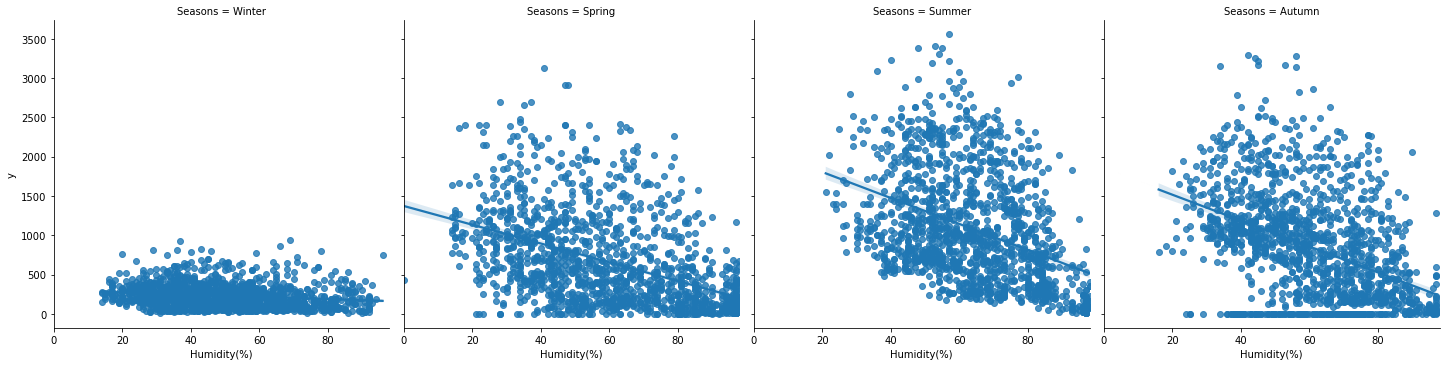

In [16]:
sns.lmplot(x="Humidity(%)",col='Seasons',y="y", data=train_df);

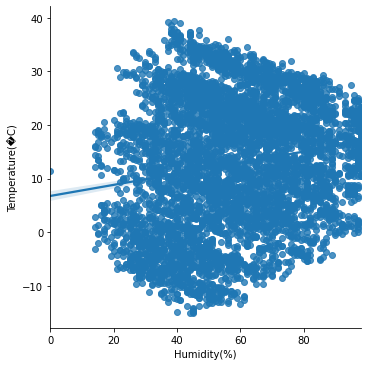

In [17]:
sns.lmplot(x="Humidity(%)",y="Temperature(�C)", data=train_df);

In [18]:
train_df[['Humidity(%)','Dew point temperature(�C)']].describe()

,Humidity(%),Dew point temperature(�C)
count,5760.000000,5760.000000
mean,58.361806,4.058264
std,19.840167,13.003582
min,0.000000,-26.900000
25%,43.000000,-5.400000
50%,57.000000,5.200000
75%,73.000000,14.700000
max,98.000000,27.200000


In [19]:
test_df[['Humidity(%)','Dew point temperature(�C)']].describe()

,Humidity(%),Dew point temperature(�C)
count,3000.000000,3000.000000
mean,57.966000,4.103667
std,21.330288,13.170840
min,0.000000,-30.600000
25%,40.000000,-3.900000
50%,58.000000,4.900000
75%,76.000000,15.600000
max,98.000000,26.800000


In [20]:
train_df['Visibility (10m)'].describe()

count    5760.000000
mean     1473.711458
std       585.879880
min        27.000000
25%      1025.750000
50%      1732.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

In [21]:
train_df.loc[train_df['Solar Radiation (MJ/m2)']>3]['y'].describe()

count     100.000000
mean     1061.880000
std       411.776008
min         0.000000
25%       875.750000
50%      1073.500000
75%      1266.000000
max      2268.000000
Name: y, dtype: float64

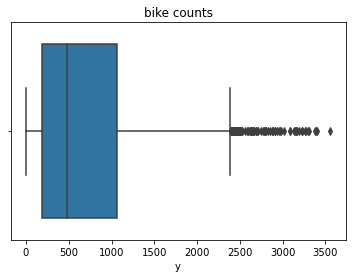

In [22]:
plt.title('bike counts');
sns.boxplot(x=train_df['y']);

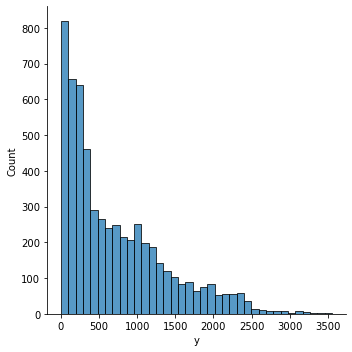

In [23]:
sns.displot(train_df['y']);

In [24]:
#skewness and kurtosis
print("Skewness: %f" % train_df['y'].skew())
print("Kurtosis: %f" % train_df['y'].kurt())

Skewness: 1.159060
Kurtosis: 0.816968


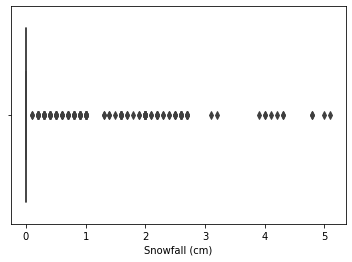

In [25]:
sns.boxplot(x=train_df['Snowfall (cm)']);

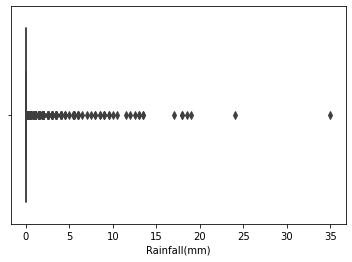

In [26]:
sns.boxplot(x=train_df['Rainfall(mm)']);

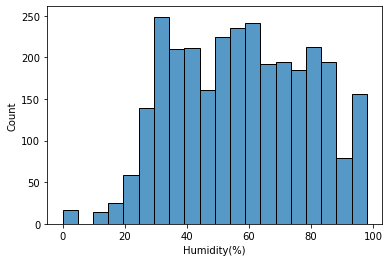

In [27]:
sns.histplot(test_df['Humidity(%)']);

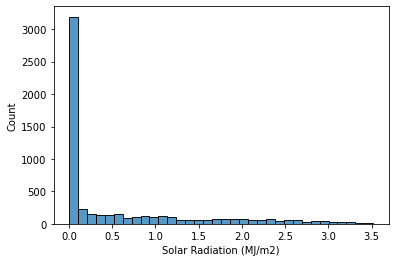

In [28]:
sns.histplot(train_df['Solar Radiation (MJ/m2)']);

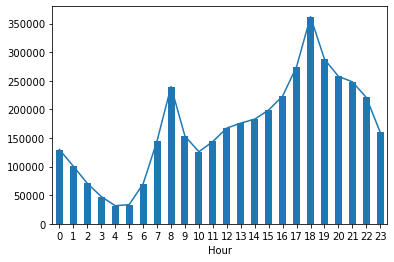

In [29]:
train_df.groupby('Hour').sum()['y'].plot.bar();
train_df.groupby('Hour').sum()['y'].plot();

### Feature Engineering

In [30]:
# Related Hours

train_df['related_hours']=0
test_df['related_hours']=0

related_hours=[12,13,14,15,16]
train_df.loc[train_df['Hour'].isin(related_hours),'related_hours']=1
test_df.loc[test_df['Hour'].isin(related_hours),'related_hours']=1

In [31]:
# binning visiblity 
bins = [-np.inf ,70, 100, 200,300, 400, np.inf]
labels = [1,2,3,4,5,6]
train_df['binned_vis'] = pd.cut(train_df['Visibility (10m)'], bins=bins, labels=labels)
test_df['binned_vis'] = pd.cut(test_df['Visibility (10m)'], bins=bins, labels=labels)

In [32]:
# binning humidity

bins1 = [-np.inf ,50, 60, 70,80, 90, np.inf]
labels1 = [1,2,3,4,5,6]
train_df['binned_hum'] = pd.cut(train_df['Humidity(%)'], bins=bins1, labels=labels1)
test_df['binned_hum'] = pd.cut(test_df['Humidity(%)'], bins=bins1, labels=labels1)

In [33]:
# Bad Weather due to rainfall

train_df['bad_weather'] =0

sel=train_df.loc[train_df['Rainfall(mm)']>.2].sort_values(by=['Rainfall(mm)'])
for index, row in sel.iterrows():
    try:
        for i in range((index -1),(index +2)):
            train_df.loc[i,'bad_weather'] = row['Rainfall(mm)']
    except:
        pass
    

test_df['bad_weather'] =0

sel1=test_df.loc[test_df['Rainfall(mm)']>.2].sort_values(by=['Rainfall(mm)'])
for index, row in sel1.iterrows():
    try:
        for i in range((index -1),(index +2)):
            test_df.loc[i,'bad_weather'] = row['Rainfall(mm)']
    except:
        pass

In [34]:
# Converting windspeed to kmh
train_df['Windkmh']=train_df['Wind speed (m/s)']*(3.6)
test_df['Windkmh']=test_df['Wind speed (m/s)']*(3.6)

In [35]:
# Temperature-Humidity Index
train_df['THI'] = 0.8 * train_df['Temperature(�C)'] + train_df['Humidity(%)']/100 * (train_df['Temperature(�C)'] - 14.4) + 46.4
test_df['THI'] = 0.8 * test_df['Temperature(�C)'] + test_df['Humidity(%)']/100 * (test_df['Temperature(�C)'] - 14.4) + 46.4

# OneHot Encoding THI
train_df['THI_comfort'] = train_df['THI'].apply(lambda x: 1 if (x <= 70) else 0)
train_df['THI_half_discomfort'] = train_df['THI'].apply(lambda x: 1 if (x > 70) & (x <=75) else 0)
train_df['THI_sweating'] = train_df['THI'].apply(lambda x: 1 if (x > 75) & (x <=80) else 0)
train_df['THI_discomfort'] = train_df['THI'].apply(lambda x: 1 if (x > 80) else 0)

test_df['THI_comfort'] = test_df['THI'].apply(lambda x: 1 if (x <= 70) else 0)
test_df['THI_half_discomfort'] = test_df['THI'].apply(lambda x: 1 if (x > 70) & (x <=75) else 0)
test_df['THI_sweating'] = test_df['THI'].apply(lambda x: 1 if (x > 75) & (x <=80) else 0)
test_df['THI_discomfort'] = test_df['THI'].apply(lambda x: 1 if (x > 80) else 0)

In [36]:
# Visibility-Range Index
train_df['Visibility_in_miles'] = (train_df['Visibility (10m)']/100) * 0.621371
test_df['Visibility_in_miles'] = (test_df['Visibility (10m)']/100) * 0.621371

# OneHot Encoding VRI
train_df['VRI_mild'] = train_df['Visibility_in_miles'].apply(lambda x: 1 if (x >= 10) else 0)
train_df['VRI_moderate'] = train_df['Visibility_in_miles'].apply(lambda x: 1 if (x < 10) & (x >= 5) else 0)
train_df['VRI_unhealthy'] = train_df['Visibility_in_miles'].apply(lambda x: 1 if (x < 5) & (x >= 1.5) else 0)
train_df['VRI_very_unhealthy'] = train_df['Visibility_in_miles'].apply(lambda x: 1 if (x < 1.5) & (x >= 1) else 0)
train_df['VRI_hazardous'] = train_df['Visibility_in_miles'].apply(lambda x: 1 if (x < 1) else 0)

test_df['VRI_mild'] = test_df['Visibility_in_miles'].apply(lambda x: 1 if (x >= 10) else 0)
test_df['VRI_moderate'] = test_df['Visibility_in_miles'].apply(lambda x: 1 if (x < 10) & (x >= 5) else 0)
test_df['VRI_unhealthy'] = test_df['Visibility_in_miles'].apply(lambda x: 1 if (x < 5) & (x >= 1.5) else 0)
test_df['VRI_very_unhealthy'] = test_df['Visibility_in_miles'].apply(lambda x: 1 if (x < 1.5) & (x >= 1) else 0)
test_df['VRI_hazardous'] = test_df['Visibility_in_miles'].apply(lambda x: 1 if (x < 1) else 0)

In [37]:
# Cloud-Base Altitude
train_df['CBI'] = (train_df['Temperature(�C)'] - train_df['Dew point temperature(�C)']) * 400
test_df['CBI'] = (test_df['Temperature(�C)'] - test_df['Dew point temperature(�C)']) * 400

# OneHot Encoding CBI
train_df['CBI_low_clouds'] = train_df['CBI'].apply(lambda x: 1 if (x <= 6500) else 0)
train_df['CBI_mid_clouds'] = train_df['CBI'].apply(lambda x: 1 if (x > 6500) & (x <= 25000) else 0)
train_df['CBI_high_clouds'] = train_df['CBI'].apply(lambda x: 1 if (x > 25000) else 0)

test_df['CBI_low_clouds'] = test_df['CBI'].apply(lambda x: 1 if (x <= 6500) else 0)
test_df['CBI_mid_clouds'] = test_df['CBI'].apply(lambda x: 1 if (x > 6500) & (x <= 25000) else 0)
test_df['CBI_high_clouds'] = test_df['CBI'].apply(lambda x: 1 if (x > 25000) else 0)

In [38]:
train_df.columns

Index(['Date', 'y', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'week_of_year', 'day_of_week', 'day',
       'year', 'month', 'related_hours', 'binned_vis', 'binned_hum',
       'bad_weather', 'Windkmh', 'THI', 'THI_comfort', 'THI_half_discomfort',
       'THI_sweating', 'THI_discomfort', 'Visibility_in_miles', 'VRI_mild',
       'VRI_moderate', 'VRI_unhealthy', 'VRI_very_unhealthy', 'VRI_hazardous',
       'CBI', 'CBI_low_clouds', 'CBI_mid_clouds', 'CBI_high_clouds'],
      dtype='object')

### Pre-Processing

In [39]:
# back-up data sets
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       5760 non-null   datetime64[ns]
 1   y                          5760 non-null   int64         
 2   Hour                       5760 non-null   int64         
 3   Temperature(�C)            5760 non-null   float64       
 4   Humidity(%)                5760 non-null   int64         
 5   Wind speed (m/s)           5760 non-null   float64       
 6   Visibility (10m)           5760 non-null   int64         
 7   Dew point temperature(�C)  5760 non-null   float64       
 8   Solar Radiation (MJ/m2)    5760 non-null   float64       
 9   Rainfall(mm)               5760 non-null   float64       
 10  Snowfall (cm)              5760 non-null   float64       
 11  Seasons                    5760 non-null   object        
 12  Holida

In [41]:
# Labeling Holiday
train_df['Holiday'] = train_df['Holiday'].map({'Holiday':1, 'No Holiday':0})
test_df['Holiday'] = test_df['Holiday'].map({'Holiday':1, 'No Holiday':0})

In [42]:
# Labeling Functioning Day
train_df['Functioning Day'] = train_df['Functioning Day'].map({'Yes':1, 'No':0})
test_df['Functioning Day'] = test_df['Functioning Day'].map({'Yes':1, 'No':0})

In [43]:
# Season Encoding
train_df['winter']=0
test_df['winter']=0
train_df.loc[(train_df['Seasons'] == 'Winter'),'winter'] =1
test_df.loc[(test_df['Seasons'] == 'Winter'),'winter'] =1

train_df['summer']=0
test_df['summer']=0
train_df.loc[(train_df['Seasons'] == 'Summer'),'summer'] =1
test_df.loc[(test_df['Seasons'] == 'Summer'),'summer'] =1

train_df['spring']=0
test_df['spring']=0
train_df.loc[(train_df['Seasons'] == 'Spring'),'spring'] =1
test_df.loc[(test_df['Seasons'] == 'Spring'),'spring'] =1

In [44]:
# Scaling Solar Radiation
train_df['Solar Radiation (MJ/m2)']=train_df['Solar Radiation (MJ/m2)'] * 10
test_df['Solar Radiation (MJ/m2)']=test_df['Solar Radiation (MJ/m2)'] * 10

In [45]:
train_df.columns

Index(['Date', 'y', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'week_of_year', 'day_of_week', 'day',
       'year', 'month', 'related_hours', 'binned_vis', 'binned_hum',
       'bad_weather', 'Windkmh', 'THI', 'THI_comfort', 'THI_half_discomfort',
       'THI_sweating', 'THI_discomfort', 'Visibility_in_miles', 'VRI_mild',
       'VRI_moderate', 'VRI_unhealthy', 'VRI_very_unhealthy', 'VRI_hazardous',
       'CBI', 'CBI_low_clouds', 'CBI_mid_clouds', 'CBI_high_clouds', 'winter',
       'summer', 'spring'],
      dtype='object')

In [46]:
train_df['rush_hour'] = train_df['Hour'].apply(lambda x: 1 if x == 8 or x == 18 or x == 7 or x == 9 or x == 17 or x == 19 else 0)
test_df['rush_hour'] = test_df['Hour'].apply(lambda x: 1 if x == 8 or x == 18 or x == 7 or x == 9 or x == 17 or x == 19 else 0)

train_df.loc[train_df['Functioning Day'] == 0 , 'rush_hour'] = 0
test_df.loc[test_df['Functioning Day'] == 0 , 'rush_hour'] = 0

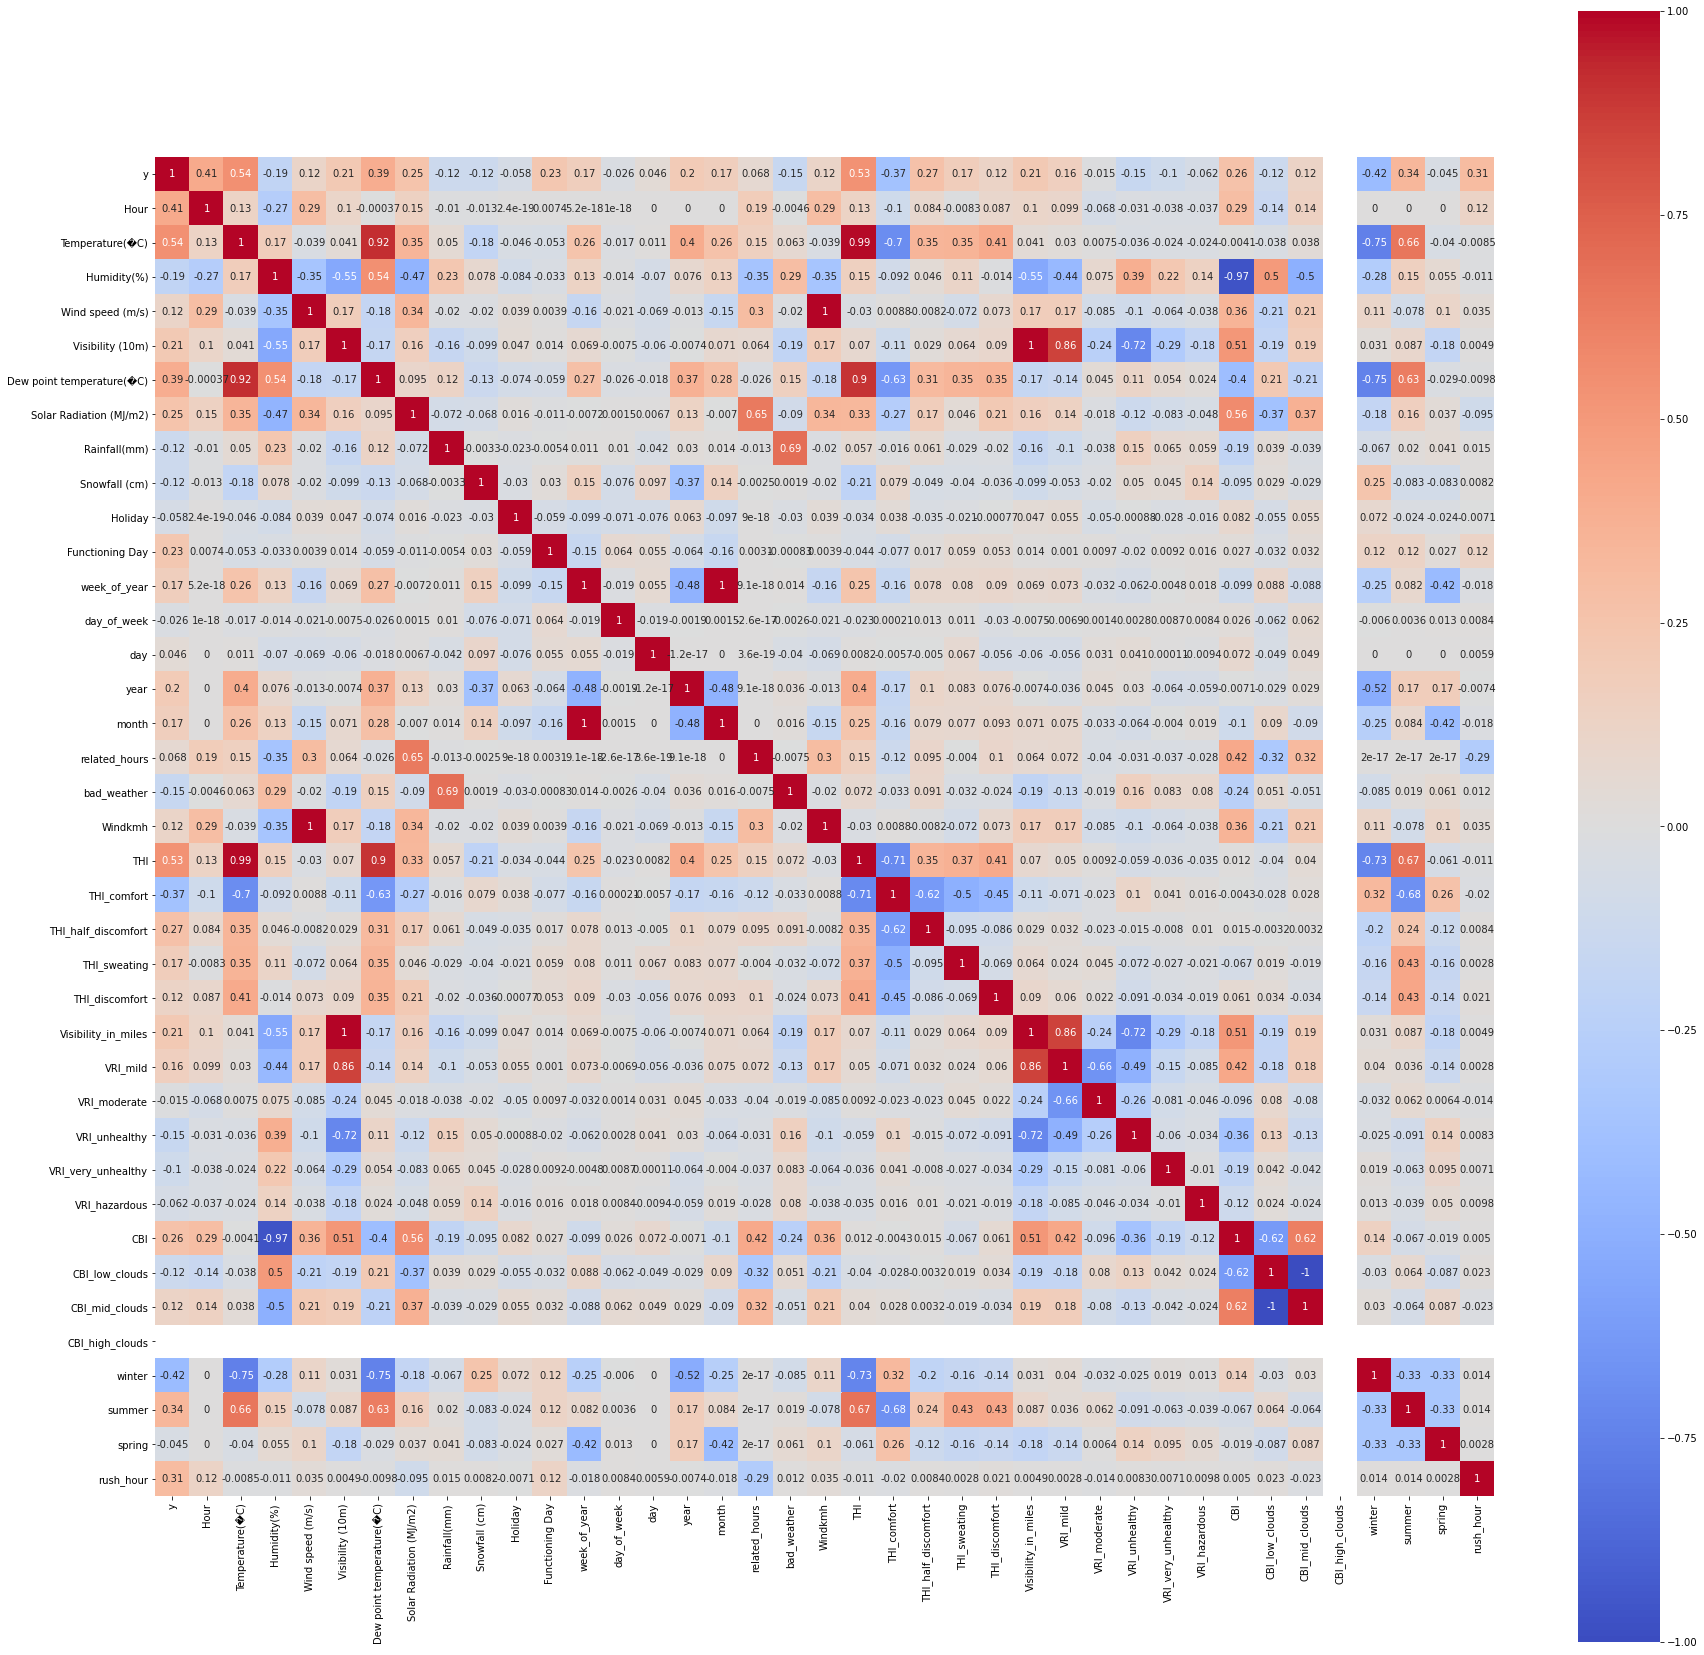

In [47]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

### Models

In [48]:
# Function to caluculate the evaluation metric RMSLE
def rmse_log(y_test, preds):
    return  (np.sqrt(np.mean(np.square(np.log(preds+1) - np.log(y_test+1)))))

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [50]:
col=['Hour','Holiday','day_of_week',
      'week_of_year','Functioning Day','Temperature(�C)','Humidity(%)','bad_weather',
     'Snowfall (cm)','Solar Radiation (MJ/m2)','winter','summer','Rainfall(mm)',
     'Visibility (10m)','Windkmh','related_hours'
     , 'rush_hour']


# Splitting dataset into training and testing
# where the training is the first 15 days of month and the rest is for test

X_train = train_df[train_df['day'].isin(list(range(1,16)))][col]
X_test = train_df[train_df['day'].isin(list(range(16,21)))][col]

y_train = np.log1p(train_df[train_df['day'].isin(list(range(1,16)))]['y'])
y_test = np.log1p(train_df[train_df['day'].isin(list(range(16,21)))]['y'])

test = test_df[col].copy()

In [51]:
#Linear Model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

x_train_pred = lr_model.predict(X_train)
model_pred = lr_model.predict(X_test)

print("train result         ",rmse_log(np.expm1(y_train),np.expm1(x_train_pred)))
print("validation result    ",rmse_log(np.expm1(y_test),np.expm1(model_pred)))

train result          0.6727951265599132
validation result     0.6768606599888762


In [52]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=11)
dtree.fit(X_train,y_train)

x_train_pred = lr_model.predict(X_train)
model_pred = lr_model.predict(X_test)

print("train result         ",rmse_log(np.expm1(y_train),np.expm1(x_train_pred)))
print("validation result    ",rmse_log(np.expm1(y_test),np.expm1(model_pred)))

train result          0.6727951265599132
validation result     0.6768606599888762


In [53]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
params = {'n_estimators': 50, 'max_depth': 9, 'random_state': 0, 'min_samples_split' : 2, 'n_jobs': -1}
rf = RandomForestRegressor(**params)
rf.fit(X_train,y_train)

x_train_pred = lr_model.predict(X_train)
model_pred = lr_model.predict(X_test)

print("train result         ",rmse_log(np.expm1(y_train),np.expm1(x_train_pred)))
print("validation result    ",rmse_log(np.expm1(y_test),np.expm1(model_pred)))

train result          0.6727951265599132
validation result     0.6768606599888762


In [54]:
# Extra Trees Model
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

model = ExtraTreesRegressor()                          
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': [80],
        "max_depth":[15],
        #'max_features': [9],
        #'min_samples_leaf':[4],
        'min_samples_split': [3],
    },
    scoring='neg_mean_squared_log_error',
    cv=12,verbose=0
)

grid_res = gsc.fit(X_train, y_train)

In [55]:
print("Best: %f using %s" % (1 + grid_res.best_score_, grid_res.best_params_))

Best: 0.993224 using {'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 80}


In [56]:
ex= ExtraTreesRegressor(**grid_res.best_params_)#n_estimators=242,max_depth=35,min_samples_leaf=2,random_state=66)
ex.fit(X_train, y_train)
y_test_predic =ex.predict(X_test)
y_train_predic=ex.predict(X_train)

print('EXTRATREEregressor : ',rmse_log(np.expm1(y_train),np.expm1(y_train_predic)))
print('EXTRATREEregressor : ',rmse_log(np.expm1(y_test),np.expm1(y_test_predic)))
print('score              : ',ex.score(X_test,y_test))

EXTRATREEregressor :  0.087194684642141
EXTRATREEregressor :  0.31342672602882243
score              :  0.9583004039137092


In [57]:
# Hist Gradient Boosting Model
from sklearn.experimental import enable_hist_gradient_boosting
from  sklearn.ensemble import  HistGradientBoostingRegressor

params = {'max_iter': 3000,'max_bins': 115,'learning_rate':.01,'max_depth':7,'max_bins':100,
          'random_state':42,'early_stopping':True}
hist = HistGradientBoostingRegressor(**params)

hist.fit(X_train,y_train)
x_train_pred = hist.predict(X_train)
model_pred = hist.predict(X_test)

print("train result         ",rmse_log(np.expm1(y_train),np.expm1(x_train_pred)))
print("validation result    ",rmse_log(np.expm1(y_test),np.expm1(model_pred)))

train result          0.18087202340794128
validation result     0.32031988985160464


In [58]:
# Gradient Boosting Model
from  sklearn.ensemble import  GradientBoostingRegressor
params = {'n_estimators': 6000 , 'max_depth':4, 'loss':'huber','max_features':'sqrt',
          'learning_rate' :0.01 ,'min_samples_leaf':9, 'min_samples_split':6}

gbm_model = GradientBoostingRegressor(**params)
gbm_model.fit(X_train,y_train)

x_train_pred = gbm_model.predict(X_train)
model_pred = gbm_model.predict(X_test)

print("train result         ",rmse_log(np.expm1(y_train),np.expm1(x_train_pred)))
print("validation result    ",rmse_log(np.expm1(y_test),np.expm1(model_pred)))

train result          0.18939149705539976
validation result     0.31074612201624535


### Result

In [59]:
predict = np.round(np.expm1(gbm_model.predict(test)))
my_s = pd.DataFrame({'ID': test_df.index, 'y': predict})
my_s.to_csv('submission.csv', index=False)